In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=[20,10]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Download the dataset directly using wget (for Linux)
# Alternatively, you can manually download the dataset and place it in the same directory as this notebook
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data

--2024-11-11 02:28:04--  https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘spambase.data.4’

spambase.data.4         [  <=>               ] 686.47K  2.27MB/s    in 0.3s    

2024-11-11 02:28:05 (2.27 MB/s) - ‘spambase.data.4’ saved [702942]



In [ ]:
# Import Google Drive to load additional files if using Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read feature names from a modified .names file stored in Google Drive
names = open('/content/drive/MyDrive/Dataset_ATI/modified.names').read().split('\n')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Dataset_ATI/modified.names'

In [ ]:
# Load the dataset into a pandas DataFrame with the specified column names
df = pd.read_csv('spambase.data', names=names)

In [ ]:
# Display the first 5 rows of the DataFrame
df.head(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
# Get a concise summary of the DataFrame, including data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [ ]:
# Generate descriptive statistics, such as mean and standard deviation, for numerical columns
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [ ]:
# Identify columns with any missing values
null_columns = df.columns[df.isnull().any()]

# Count and display the number of missing values in each column with missing values
df[null_columns].isnull().sum()

,0


<Axes: >

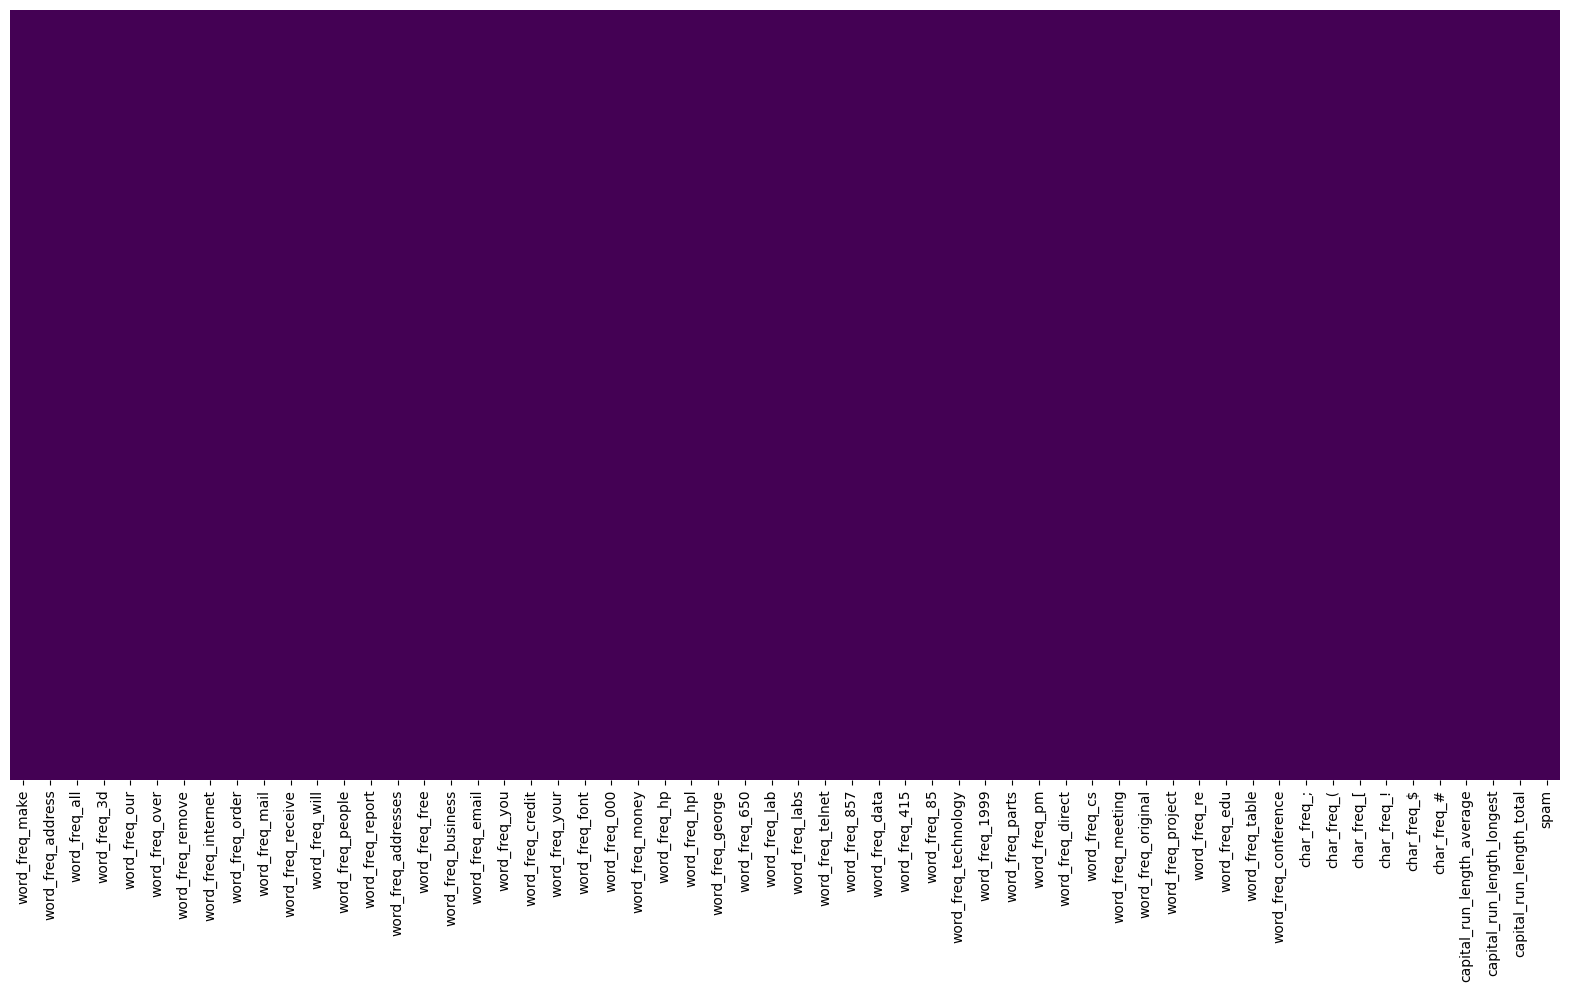

In [ ]:
# Create a heatmap to visually show missing values in the dataset
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
# Tách bộ dữ liệu thành các đặc trưng (X) và nhãn mục tiêu (y)
# X chứa 57 cột đầu tiên, là các đặc trưng
# y chứa cột 'spam', là nhãn mục tiêu
X = df.iloc[:, :57]
y = df['spam']

In [ ]:
# Kiểm tra độ lệch (skewness) của các đặc trưng trong bộ dữ liệu
df.skew()

,0
word_freq_make,5.675639
word_freq_address,10.086811
word_freq_all,3.009249
word_freq_3d,26.227744
word_freq_our,4.747126
word_freq_over,5.956953
word_freq_remove,6.765580
word_freq_internet,9.724848
word_freq_order,5.226067
word_freq_mail,8.487810


In [ ]:
import scipy.stats as stats

In [ ]:
# Nếu độ lệch của một cột vượt quá ngưỡng, áp dụng phép biến đổi Yeo-Johnson để chuẩn hóa
for i,j in list(zip(df.drop('spam',axis=1).columns,df.drop('spam',axis=1).skew())):
    if df[i].skew()<-3 or df[i].skew()>3:
        df[i] = pd.Series(stats.yeojohnson(df[i])[0])
    else:
        df[i] = df[i]*1

In [ ]:
df.skew()

,0
word_freq_make,1.448753
word_freq_address,1.683909
word_freq_all,0.643640
word_freq_3d,9.751663
word_freq_our,0.780104
word_freq_over,1.502587
word_freq_remove,1.835787
word_freq_internet,1.794778
word_freq_order,1.863617
word_freq_mail,1.143559


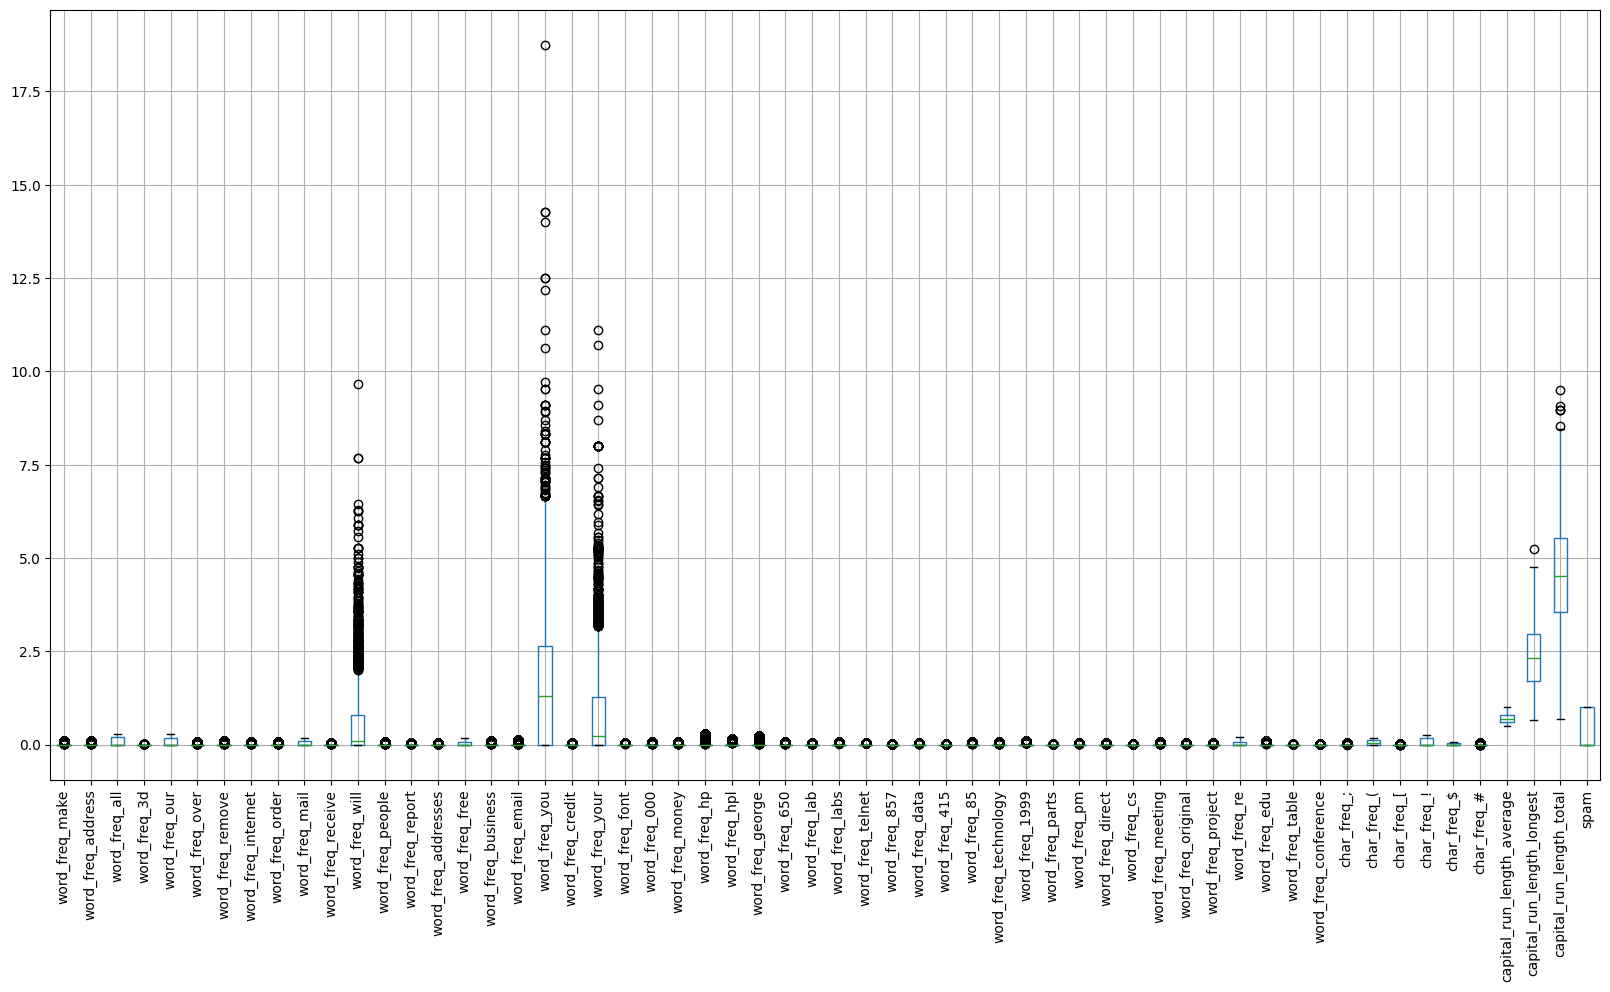

In [ ]:
df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Chia bộ dữ liệu thành bộ huấn luyện và bộ kiểm tra, với 33% dữ liệu cho kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Tách nhãn mục tiêu 'spam' ra khỏi các đặc trưng
y=df['spam']
x=df.drop('spam',axis=1)

In [ ]:
import statsmodels.api as sm

In [ ]:
# @title Giải thích: Bảng tóm tắt giúp đánh giá chất lượng của mô hình và các ảnh hưởng của biến đặc trưng lên kết quả phân loại.

# Thêm hằng số vào dữ liệu đặc trưng
xc=sm.add_constant(x)
# Xây dựng mô hình hồi quy logistic và in ra tóm tắt mô hình
model=sm.Logit(y,xc).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.159635
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                   spam   No. Observations:                 4601
Model:                          Logit   Df Residuals:                     4565
Method:                           MLE   Df Model:                           35
Date:                Mon, 11 Nov 2024   Pseudo R-squ.:                  0.7619
Time:                        02:54:41   Log-Likelihood:                -734.48
converged:                       True   LL-Null:                       -3085.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -5.5704      0.566     -9.841      0.000     

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS,RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [ ]:
# Chia lại bộ dữ liệu huấn luyện và kiểm tra với 20% dữ liệu cho kiểm tra
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# @title Giải thích: giúp giảm số lượng đặc trưng từ ban đầu xuống còn 35, giúp mô hình hồi quy Logistic hiệu quả hơn bằng cách loại bỏ các đặc trưng không cần thiết hoặc ít liên quan.

# Khởi tạo mô hình hồi quy logistic
lr=LogisticRegression()

# Áp dụng phương pháp RFE để chọn 35 đặc trưng tốt nhất
rfe = RFE(estimator=lr,n_features_to_select=35)
rfe_model = rfe.fit(xtrain, ytrain)

# Hiển thị xếp hạng của các đặc trưng sau khi áp dụng RFE
rfe_model.ranking_

array([12,  1, 15, 20,  1,  1,  1,  1,  1,  1,  1,  7, 16,  1,  1,  1,  1,
        1, 14,  1,  6, 19,  1,  1,  1,  1,  1,  1,  1,  1,  2, 17,  1, 18,
        1, 13,  1, 21,  1, 23,  3,  1,  4,  1,  1,  1, 22,  5,  8,  1, 10,
        1,  1, 11,  1,  1,  9])

In [ ]:
# Tạo DataFrame để hiển thị tên đặc trưng và xếp hạng của chúng
rank_df=pd.DataFrame({'features':xtrain.columns,'ranks':rfe_model.ranking_})
rank_df.head()

,features,ranks
0,word_freq_make,12
1,word_freq_address,1
2,word_freq_all,15
3,word_freq_3d,20
4,word_freq_our,1


In [ ]:
# Lấy các đặc trưng có xếp hạng 1 (đặc trưng quan trọng nhất)
feat=list(rank_df[rank_df['ranks']==1]['features'].values)
feat

['word_freq_address',
 'word_freq_our',
 'word_freq_over',
 'word_freq_remove',
 'word_freq_internet',
 'word_freq_order',
 'word_freq_mail',
 'word_freq_receive',
 'word_freq_report',
 'word_freq_addresses',
 'word_freq_free',
 'word_freq_business',
 'word_freq_email',
 'word_freq_credit',
 'word_freq_000',
 'word_freq_money',
 'word_freq_hp',
 'word_freq_hpl',
 'word_freq_george',
 'word_freq_650',
 'word_freq_lab',
 'word_freq_labs',
 'word_freq_data',
 'word_freq_85',
 'word_freq_1999',
 'word_freq_pm',
 'word_freq_meeting',
 'word_freq_project',
 'word_freq_re',
 'word_freq_edu',
 'char_freq_(',
 'char_freq_!',
 'char_freq_$',
 'capital_run_length_average',
 'capital_run_length_longest']

In [ ]:
# Chỉ giữ lại các đặc trưng quan trọng nhất cho mô hình
x = x[feat]
x.head()

,word_freq_address,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_report,word_freq_addresses,...,word_freq_pm,word_freq_meeting,word_freq_project,word_freq_re,word_freq_edu,char_freq_(,char_freq_!,char_freq_$,capital_run_length_average,capital_run_length_longest
0,0.108843,0.174895,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.230002,0.000000,0.789994,3.154855
1,0.098386,0.104263,0.079335,0.076421,0.045664,0.000000,0.180073,0.049465,0.038732,0.033292,...,0.0,0.0,0.0,0.000000,0.000000,0.090528,0.182130,0.067774,0.836739,3.428759
2,0.000000,0.260403,0.073240,0.074432,0.060604,0.072404,0.129708,0.050552,0.000000,0.034014,...,0.0,0.0,0.0,0.050603,0.042939,0.095370,0.157588,0.068156,0.907966,4.176325
3,0.000000,0.228663,0.000000,0.082016,0.079839,0.070735,0.171997,0.050394,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.092766,0.101109,0.000000,0.779836,2.912721
4,0.000000,0.228663,0.000000,0.082016,0.079839,0.070735,0.171997,0.050394,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.091878,0.100036,0.000000,0.779836,2.912721


In [ ]:
# Kiểm tra các giá trị duy nhất của cột 'word_freq_pm'
df['word_freq_pm'].unique()

array([0.        , 0.04845732, 0.04168358, 0.04027724, 0.0484659 ,
       0.0484659 , 0.04845103, 0.04712724, 0.04845841, 0.0385621 ,
       0.0484488 , 0.0428388 , 0.04798074, 0.04846451, 0.01625607,
       0.04846523, 0.04846531, 0.04846538, 0.04845607, 0.04733952,
       0.04830828, 0.02688914, 0.04811624, 0.04778917, 0.04656678,
       0.04833101, 0.04846589, 0.04751678, 0.0484615 , 0.04835032,
       0.04846432, 0.04846411, 0.04845935, 0.0484659 , 0.0484659 ,
       0.04789329, 0.0484659 , 0.04824991, 0.0484659 , 0.04844321,
       0.04846588, 0.0482126 , 0.0482815 , 0.00899536, 0.0461988 ,
       0.04836676, 0.0484659 , 0.0484659 , 0.0484659 , 0.0484659 ,
       0.0484659 , 0.0484659 , 0.04805429, 0.04846578, 0.04846588,
       0.0484659 , 0.0484659 , 0.04575537, 0.04846017, 0.04846589,
       0.0484659 , 0.04843972, 0.04846481, 0.04846584, 0.0484659 ,
       0.04846505, 0.0484659 , 0.04846574, 0.04846204, 0.04846467,
       0.04845463, 0.04846561, 0.0484659 , 0.04687263, 0.04846

In [ ]:
# Chia lại bộ dữ liệu huấn luyện và kiểm tra
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)



In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Khởi tạo và huấn luyện mô hình hồi quy logistic
lr=LogisticRegression()
lr_model = lr.fit(xtrain, ytrain)
lr_model

LogisticRegression()

In [ ]:
# Dự đoán trên bộ huấn luyện và bộ kiểm tra
y_pred_train = lr_model.predict(xtrain)
y_pred_test = lr_model.predict(xtest)

In [ ]:
# Tính toán và in ra độ chính xác trên bộ huấn luyện và bộ kiểm tra
accuracy_score(ytrain, y_pred_train), accuracy_score(ytest, y_pred_test)

(0.9152173913043479, 0.9218241042345277)



---


### **Kết Luận**
* Accuracy (92%).
* Precision và Recall đều cao, đặc biệt là cho lớp spam (lớp 1).
* F1-Score của cả hai lớp đều khá tốt, cho thấy mô hình có sự cân bằng tốt giữa việc dự đoán đúng (Precision) và không bỏ sót (Recall).
* AUC (0.975) cho thấy mô hình phân biệt giữa các lớp rất tốt.



In [ ]:
print("Classification Report:\n", classification_report(ytest, y_pred_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       531
           1       0.94      0.87      0.90       390

    accuracy                           0.92       921
   macro avg       0.93      0.91      0.92       921
weighted avg       0.92      0.92      0.92       921





---


### **Kết luận**
*   True Positives (338) và True Negatives (511) cho thấy mô hình dự đoán chính xác cả hai lớp khá tốt.

* False Positives (20) và False Negatives (52) cho thấy mô hình có thể cải thiện một chút trong việc phân loại chính xác lớp spam, nhưng kết quả vẫn khá tốt.

* Precision và Recall cho lớp 1 (spam) đều khá cao, với Precision = 0.94 và Recall = 0.87, điều này cho thấy mô hình có thể dự đoán chính xác spam nhưng vẫn có thể cải thiện khả năng không bỏ sót email spam. ****






In [ ]:
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred_test))

Confusion Matrix:
 [[511  20]
 [ 52 338]]




---


### Kết luận

* AUC cao cho thấy mô hình của có thể phân loại các email spam và không spam một cách chính xác với rất ít sai sót.
* Với giá trị AUC = 0.9751, mô hình của đang hoạt động rất tốt và gần như không có lỗi lớn trong việc phân loại giữa các lớp.



In [ ]:
y_pred_proba = lr_model.predict_proba(xtest)[:, 1]  # Xác suất dự đoán lớp 1
auc_score = roc_auc_score(ytest, y_pred_proba)
print("Area Under Curve (AUC):", auc_score)

Area Under Curve (AUC): 0.9751267564826887
